In [1]:
import os

In [2]:
CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
print(CONDA_PREFIX) #  Must be NONE

None


In [3]:
if not CONDA_PREFIX:
  !python -m pip install condacolab # Used for installing conda
  import condacolab
  condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


In [1]:
%%writefile environment.yml
channels:
  - litex-hub
  - conda-forge
dependencies:
  - open_pdks.sky130a
  - magic
  - gdstk
  - cairosvg
  - pyspice

Writing environment.yml


In [2]:
!mamba env update -n base -f environment.yml

Streaming output truncated to the last 5000 lines.
Extracting   (1)  ⣾  [+] 3m:3.9s
Extracting   (1)  ⣾  [+] 3m:4.0s
Extracting   (1)  ⣾  [+] 3m:4.1s
Extracting   (1)  ⣾  [+] 3m:4.2s
Extracting   (1)  ⣾  [+] 3m:4.3s
Extracting   (1)  ⣾  [+] 3m:4.4s
Extracting   (1)  ⣾  [+] 3m:4.5s
Extracting   (1)  ⣾  [+] 3m:4.6s
Extracting   (1)  ⣾  [+] 3m:4.7s
Extracting   (1)  ⣾  [+] 3m:4.8s
Extracting   (1)  ⣾  [+] 3m:4.9s
Extracting   (1)  ⣾  [+] 3m:5.0s
Extracting   (1)  ⣾  [+] 3m:5.1s
Extracting   (1)  ⣾  [+] 3m:5.2s
Extracting   (1)  ⣾  [+] 3m:5.3s
Extracting   (1)  ⣾  [+] 3m:5.4s
Extracting   (1)  ⣾  [+] 3m:5.5s
Extracting   (1)  ⣾  [+] 3m:5.6s
Extracting   (1)  ⣾  [+] 3m:5.7s
Extracting   (1)  ⣾  [+] 3m:5.8s
Extracting   (1)  ⣾  [+] 3m:5.9s
Extracting   (1)  ⣾  [+] 3m:6.0s
Extracting   (1)  ⣾  [+] 3m:6.1s
Extracting   (1)  ⣾  [+] 3m:6.2s
Extracting   (1)  ⣾  [+] 3m:6.3s
Extracting   (1)  ⣾  [+] 3m:6.4s
Extracting   (1)  ⣾  [+] 3m:6.5s
Extracting   (1)  ⣾  [+] 3m:6.6s
Extracting   (1)  ⣾  [+] 

In [1]:
import os

CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  import condacolab
  CONDA_PREFIX = condacolab.PREFIX
else:
  print("Error, environ var not found")

In [2]:
%%script magic -dnull -noconsole -rcfile {CONDA_PREFIX}/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc
cellname rename (UNNAMED) mosfet

box 0 0 950nm 650nm
paint ndiffusion

box 400nm -600nm 550nm 1200nm
paint polysilicon

box 0 0 400nm 650nm
label source
port make 3

box 550nm 0 950nm 650nm
label drain
port make 1

box 400nm -600nm 550nm 0
label gate
port make 2

extract
ext2spice lvs
ext2spice cthresh 0
ext2spice

gds labels no
gds write mosfet.gds


Magic 8.3 revision 444 - Compiled on Sat Nov  4 05:28:33 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.456-0-g2a38e86
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:   0.950 x 0.650   ( 0.000,  0.000), ( 0.950,  0.650)  0.618     
lambda:    95.00 x 65.00   (  0.00,  0.00 ), ( 95.00,  65.00)  6175.00   
internal:    190 x 130     (     0,  0    ), (   190,  130  )  24700     
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (unit

In [10]:
%%script magic -dnull -noconsole -rcfile {CONDA_PREFIX}/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc

# Create nMOS transistor
cellname rename (UNNAMED) nmos
box 0 0 950nm 650nm
paint ndiffusion
box 400nm -600nm 550nm 1200nm
paint polysilicon
box 0 0 400nm 650nm
label source
port make 3
box 550nm 0 950nm 650nm
label drain
port make 1
box 400nm -600nm 550nm 0
label gate
port make 2

# Create pMOS transistor
cellname rename (UNNAMED) pmos
box 0 0 950nm 650nm
paint pdiffusion
box 400nm -600nm 550nm 1200nm
paint polysilicon
box 0 0 400nm 650nm
label source
port make 3
box 550nm 0 950nm 650nm
label drain
port make 1
box 400nm -600nm 550nm 0
label gate
port make 2

# Connect nMOS and pMOS transistors to create an inverter
load nmos
put {x+2000nm y+0}
load pmos
put {x+2000nm y+0}
extract
ext2spice lvs
ext2spice cthresh 0
ext2spice

# Optionally write the layout to a GDS file
gds labels no
gds write inverter.gds






Magic 8.3 revision 444 - Compiled on Sat Nov  4 05:28:33 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.456-0-g2a38e86
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:   0.950 x 0.650   ( 0.000,  0.000), ( 0.950,  0.650)  0.618     
lambda:    95.00 x 65.00   (  0.00,  0.00 ), ( 95.00,  65.00)  6175.00   
internal:    190 x 130     (     0,  0    ), (   190,  130  )  24700     
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (unit

invalid command name "put"
Cell pmos couldn't be read
No such file or directory
invalid command name "put"


In [3]:
import gdstk

In [4]:
import cairosvg

In [7]:
!sudo pip install --upgrade cffi==1.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.15.1
    Uninstalling cffi-1.15.1:
      Successfully uninstalled cffi-1.15.1


In [8]:
!pip show cffi

Name: cffi
Version: 1.15.0
Summary: Foreign Function Interface for Python calling C code.
Home-page: http://cffi.readthedocs.org
Author: Armin Rigo, Maciej Fijalkowski
Author-email: python-cffi@googlegroups.com
License: MIT
Location: /usr/local/lib/python3.10/site-packages
Requires: pycparser
Required-by: brotlipy, cairocffi, cryptography, PySpice


In [9]:
!pip uninstall cffi -y

Found existing installation: cffi 1.15.0
Uninstalling cffi-1.15.0:
  Successfully uninstalled cffi-1.15.0


In [10]:
!pip install cffi==1.16.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.9/443.9 kB 7.8 MB/s eta 0:00:00


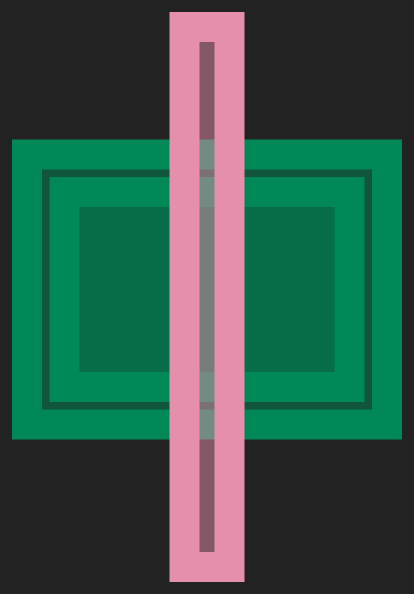

In [5]:
from IPython.display import Image

library = gdstk.read_gds('mosfet.gds')
top_cells = library.top_level()
top_cells[0].write_svg('mosfet.svg')
cairosvg.svg2png(url='mosfet.svg', write_to='mosfet.png', scale=30.0)
Image('mosfet.png')

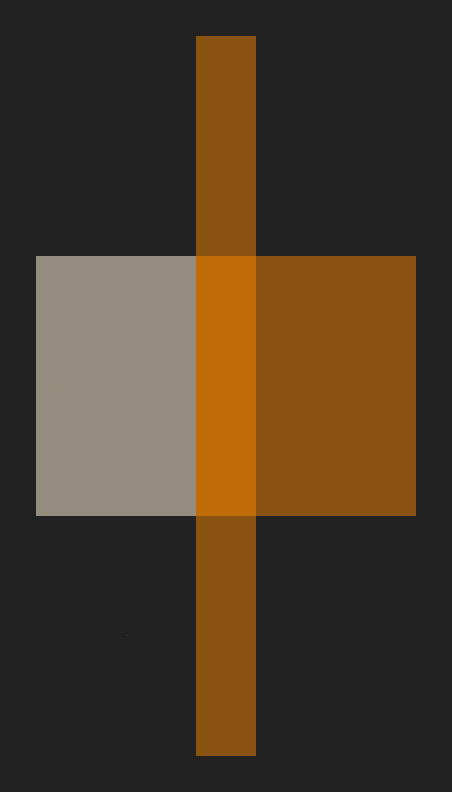

In [22]:
from IPython.display import Image
import gdstk
import cairosvg

# Create an nMOS layout
nmos = gdstk.Cell('nmos')

# Define the layout geometry for the nMOS transistor (example dimensions)
nmos.add(gdstk.Polygon([(0, 0), (0, 650), (950, 650), (950, 0)], 0))
nmos.add(gdstk.Polygon([(400, -600), (400, 1200), (550, 1200), (550, -600)], 0))
nmos.add(gdstk.Polygon([(0, 0), (0, 650), (400, 650), (400, 0)], 1))

# Add labels with correct anchor points
nmos.add(gdstk.Label('source', (50, 325), anchor='w'))
nmos.add(gdstk.Label('gate', (225, -300), anchor='w'))
nmos.add(gdstk.Label('drain', (800, 325), anchor='w'))

# Create a library and add the nMOS cell
lib = gdstk.Library()
lib.add(nmos)

# Write the nMOS layout to a GDS file
lib.write_gds('nmos.gds')

# Write the SVG representation of the nMOS
nmos.write_svg('nmos.svg')

# Convert SVG to PNG
cairosvg.svg2png(url='nmos.svg', write_to='nmos.png', scale=0.04)


# Display the PNG image
Image('nmos.png')



# nmos.add(gdstk.Polygon([(0, 0), (0, 650), (950, 650), (950, 0)], 0)): This polygon likely represents the active area of the nMOS transistor, where the source, gate, and drain regions are defined. The (0, 0) to (0, 650) and (950, 650) to (950, 0) lines create the boundary of the active area on layer 0.

# nmos.add(gdstk.Polygon([(400, -600), (400, 1200), (550, 1200), (550, -600)], 0)): This polygon could represent the polysilicon gate layer. The rectangle is positioned in the active area, and its dimensions may represent the gate region.

# nmos.add(gdstk.Polygon([(0, 0), (0, 650), (400, 650), (400, 0)], 1)): This polygon might represent the n-diffusion (source/drain) region. It is positioned within the active area, and its dimensions may define the source and drain regions.


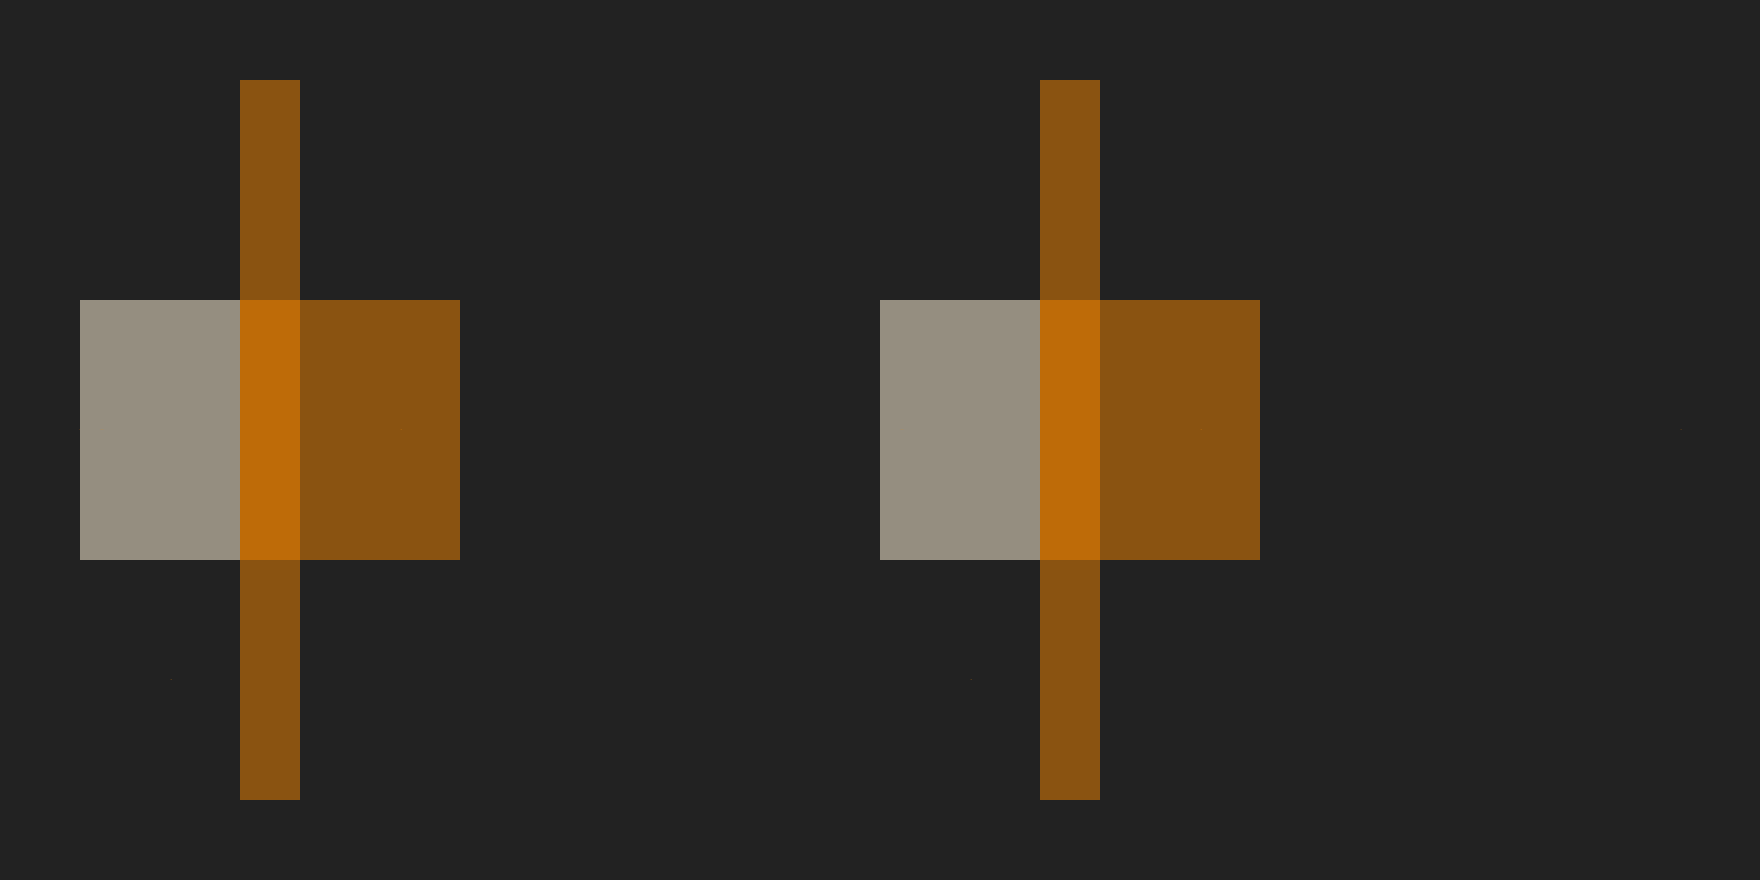

In [24]:
from IPython.display import Image
import gdstk
import cairosvg

# Create a library for the inverter
inverter_lib = gdstk.Library()

# Create an nMOS layout
nmos = gdstk.Cell('nmos')
nmos.add(gdstk.Polygon([(0, 0), (0, 650), (950, 650), (950, 0)], 0))
nmos.add(gdstk.Polygon([(400, -600), (400, 1200), (550, 1200), (550, -600)], 0))
nmos.add(gdstk.Polygon([(0, 0), (0, 650), (400, 650), (400, 0)], 1))
nmos.add(gdstk.Label('source', (50, 325), anchor='w'))
nmos.add(gdstk.Label('gate', (225, -300), anchor='w'))
nmos.add(gdstk.Label('drain', (800, 325), anchor='w'))

# Create a pMOS layout
pmos = gdstk.Cell('pmos')
pmos.add(gdstk.Polygon([(0, 0), (0, 650), (950, 650), (950, 0)], 0))
pmos.add(gdstk.Polygon([(400, -600), (400, 1200), (550, 1200), (550, -600)], 0))
pmos.add(gdstk.Polygon([(0, 0), (0, 650), (400, 650), (400, 0)], 1))
pmos.add(gdstk.Label('source', (50, 325), anchor='w'))
pmos.add(gdstk.Label('gate', (225, -300), anchor='w'))
pmos.add(gdstk.Label('drain', (800, 325), anchor='w'))

# Create the inverter cell
inverter = gdstk.Cell('inverter')
inverter.add(gdstk.Reference(nmos))
inverter.add(gdstk.Reference(pmos, origin=(2000, 0)))

# Add connections for the inverter
inverter.add(gdstk.Polygon([(400, 325), (400, 325), (400, 325)], 0))

# Add labels for inputs and outputs
inverter.add(gdstk.Label('IN', (0, 325), anchor='e'))
inverter.add(gdstk.Label('OUT', (4000, 325), anchor='w'))

# Add the inverter cell to the library
inverter_lib.add(inverter)

# Write the inverter layout to a GDS file
inverter_lib.write_gds('inverter.gds')

# Write the SVG representation of the inverter
inverter.write_svg('inverter.svg')

# Convert SVG to PNG
cairosvg.svg2png(url='inverter.svg', write_to='inverter.png', scale=0.04)

# Display the PNG image
Image('inverter.png')


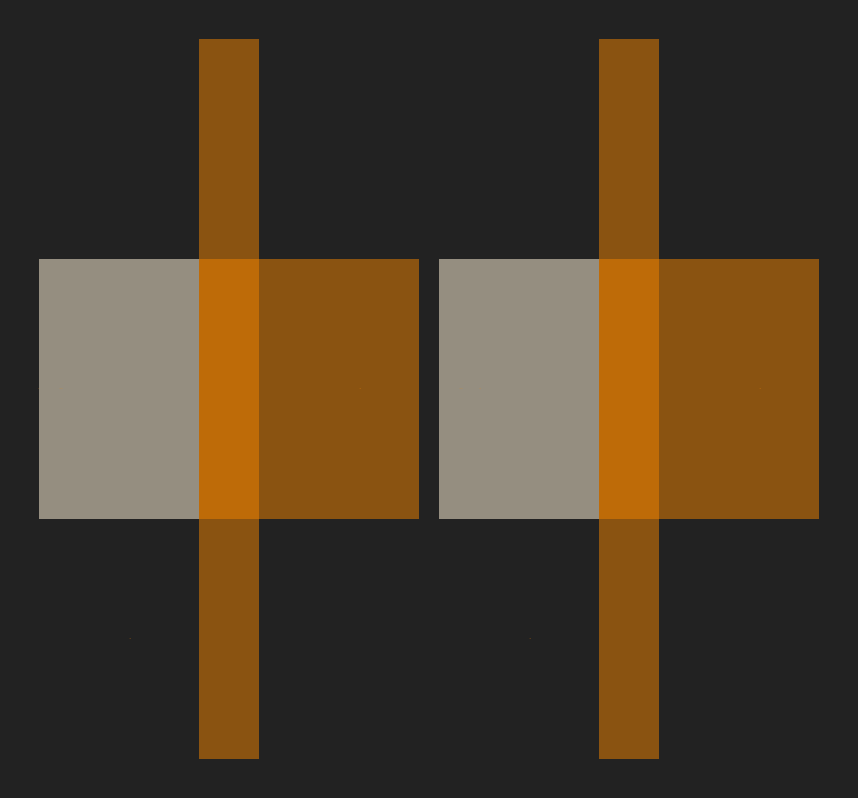

In [25]:
from IPython.display import Image
import gdstk
import cairosvg

# Create a library for the inverter
inverter_lib = gdstk.Library()

# Create an nMOS layout
nmos = gdstk.Cell('nmos')
nmos.add(gdstk.Polygon([(0, 0), (0, 650), (950, 650), (950, 0)], 0))
nmos.add(gdstk.Polygon([(400, -600), (400, 1200), (550, 1200), (550, -600)], 0))
nmos.add(gdstk.Polygon([(0, 0), (0, 650), (400, 650), (400, 0)], 1))
nmos.add(gdstk.Label('source', (50, 325), anchor='w'))
nmos.add(gdstk.Label('gate', (225, -300), anchor='w'))
nmos.add(gdstk.Label('drain', (800, 325), anchor='w'))

# Create a pMOS layout
pmos = gdstk.Cell('pmos')
pmos.add(gdstk.Polygon([(0, 0), (0, 650), (950, 650), (950, 0)], 0))
pmos.add(gdstk.Polygon([(400, -600), (400, 1200), (550, 1200), (550, -600)], 0))
pmos.add(gdstk.Polygon([(0, 0), (0, 650), (400, 650), (400, 0)], 1))
pmos.add(gdstk.Label('source', (50, 325), anchor='w'))
pmos.add(gdstk.Label('gate', (225, -300), anchor='w'))
pmos.add(gdstk.Label('drain', (800, 325), anchor='w'))

# Create the inverter cell
inverter = gdstk.Cell('inverter')
inverter.add(gdstk.Reference(nmos, origin=(0, 0)))
inverter.add(gdstk.Reference(pmos, origin=(1000, 0)))

# Add connections for the inverter
inverter.add(gdstk.Polygon([(400, 325), (1000, 325)], 0))

# Add labels for inputs and outputs
inverter.add(gdstk.Label('IN', (0, 325), anchor='e'))
inverter.add(gdstk.Label('OUT', (1100, 325), anchor='w'))

# Add the inverter cell to the library
inverter_lib.add(inverter)

# Write the inverter layout to a GDS file
inverter_lib.write_gds('inverter.gds')

# Write the SVG representation of the inverter
inverter.write_svg('inverter.svg')

# Convert SVG to PNG
cairosvg.svg2png(url='inverter.svg', write_to='inverter.png', scale=0.04)

# Display the PNG image
Image('inverter.png')


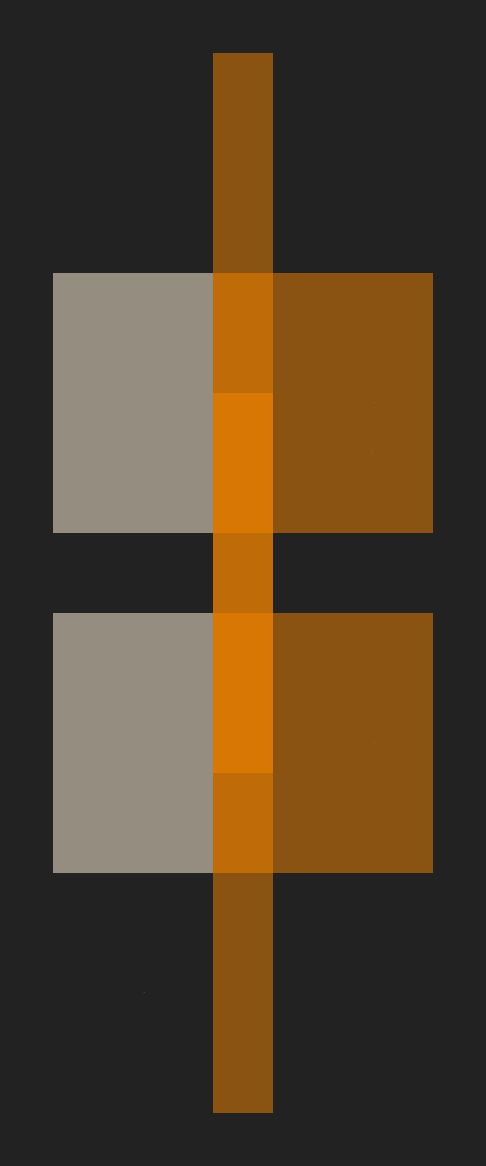

In [26]:
from IPython.display import Image
import gdstk
import cairosvg

# Create a library for the inverter
inverter_lib = gdstk.Library()

# Create an nMOS layout
nmos = gdstk.Cell('nmos')
nmos.add(gdstk.Polygon([(0, 0), (0, 650), (950, 650), (950, 0)], 0))
nmos.add(gdstk.Polygon([(400, -600), (400, 1200), (550, 1200), (550, -600)], 0))
nmos.add(gdstk.Polygon([(0, 0), (0, 650), (400, 650), (400, 0)], 1))
nmos.add(gdstk.Label('source', (50, 325), anchor='w'))
nmos.add(gdstk.Label('gate', (225, -300), anchor='w'))
nmos.add(gdstk.Label('drain', (800, 325), anchor='w'))

# Create a pMOS layout
pmos = gdstk.Cell('pmos')
pmos.add(gdstk.Polygon([(0, 0), (0, 650), (950, 650), (950, 0)], 0))
pmos.add(gdstk.Polygon([(400, -600), (400, 1200), (550, 1200), (550, -600)], 0))
pmos.add(gdstk.Polygon([(0, 0), (0, 650), (400, 650), (400, 0)], 1))
pmos.add(gdstk.Label('source', (50, 325), anchor='w'))
pmos.add(gdstk.Label('gate', (225, -300), anchor='w'))
pmos.add(gdstk.Label('drain', (800, 325), anchor='w'))

# Create the inverter cell
inverter = gdstk.Cell('inverter')
inverter.add(gdstk.Reference(pmos))
inverter.add(gdstk.Reference(nmos, origin=(0, -850)))

# Add connections for VIN and VOUT
inverter.add(gdstk.Polygon([(400, 325), (400, -525)], 0))
inverter.add(gdstk.Polygon([(800, 325), (800, -525)], 0))

# Add labels for inputs and outputs
inverter.add(gdstk.Label('VIN', (400, 200), anchor='e'))
inverter.add(gdstk.Label('VOUT', (800, 200), anchor='e'))

# Add the inverter cell to the library
inverter_lib.add(inverter)

# Write the inverter layout to a GDS file
inverter_lib.write_gds('inverter.gds')

# Write the SVG representation of the inverter
inverter.write_svg('inverter.svg')

# Convert SVG to PNG
cairosvg.svg2png(url='inverter.svg', write_to='inverter.png', scale=0.04)

# Display the PNG image
Image('inverter.png')


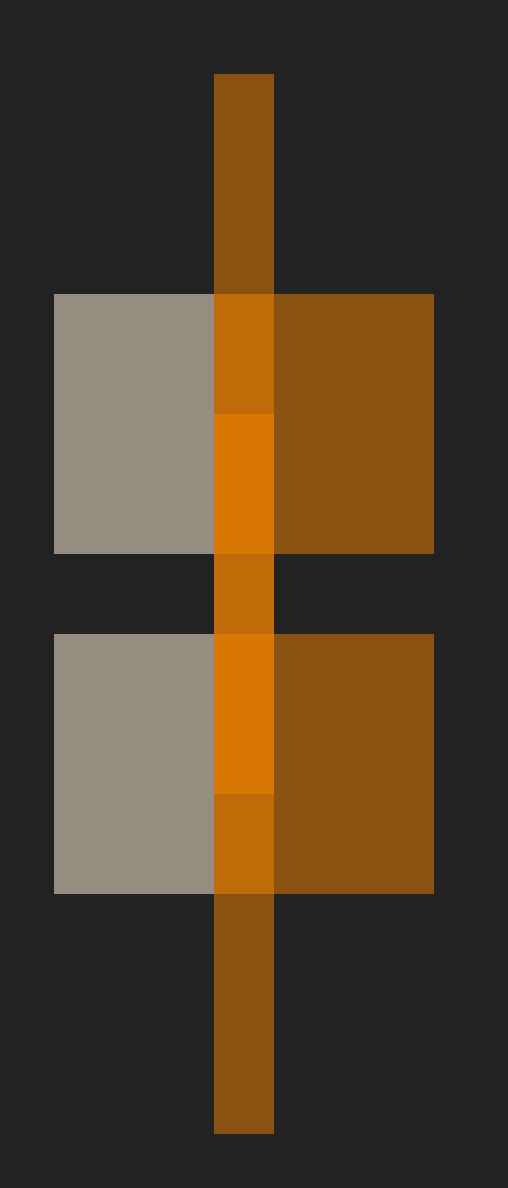

In [27]:
from IPython.display import Image
import gdstk
import cairosvg

# Create a library for the inverter
inverter_lib = gdstk.Library()

# Create an nMOS layout
nmos = gdstk.Cell('nmos')
nmos.add(gdstk.Polygon([(0, 0), (0, 650), (950, 650), (950, 0)], 0))
nmos.add(gdstk.Polygon([(400, -600), (400, 1200), (550, 1200), (550, -600)], 0))
nmos.add(gdstk.Polygon([(0, 0), (0, 650), (400, 650), (400, 0)], 1))
nmos.add(gdstk.Label('source', (50, 325), anchor='w'))
nmos.add(gdstk.Label('gate', (225, -300), anchor='w'))
nmos.add(gdstk.Label('drain', (800, 325), anchor='w'))

# Create a pMOS layout
pmos = gdstk.Cell('pmos')
pmos.add(gdstk.Polygon([(0, 0), (0, 650), (950, 650), (950, 0)], 0))
pmos.add(gdstk.Polygon([(400, -600), (400, 1200), (550, 1200), (550, -600)], 0))
pmos.add(gdstk.Polygon([(0, 0), (0, 650), (400, 650), (400, 0)], 1))
pmos.add(gdstk.Label('source', (50, 325), anchor='w'))
pmos.add(gdstk.Label('gate', (225, -300), anchor='w'))
pmos.add(gdstk.Label('drain', (800, 325), anchor='w'))

# Create the inverter cell
inverter = gdstk.Cell('inverter')
inverter.add(gdstk.Reference(pmos))
inverter.add(gdstk.Reference(nmos, origin=(0, -850)))

# Add connections for VIN and VOUT
inverter.add(gdstk.Polygon([(400, 325), (400, -525)], 0))
inverter.add(gdstk.Polygon([(800, 325), (800, -525)], 0))

# Add labels for VIN, VOUT, VDD, and GND
inverter.add(gdstk.Label('VIN', (400, 400), anchor='e'))
inverter.add(gdstk.Label('VOUT', (800, 400), anchor='e'))
inverter.add(gdstk.Label('VDD', (1000, 1250), anchor='e'))
inverter.add(gdstk.Label('GND', (1000, -1200), anchor='e'))

# Add connections for VDD and GND
inverter.add(gdstk.Polygon([(1000, 1100), (1000, 1100), (1000, -1050)], 0))

# Add the inverter cell to the library
inverter_lib.add(inverter)

# Write the inverter layout to a GDS file
inverter_lib.write_gds('inverter.gds')

# Write the SVG representation of the inverter
inverter.write_svg('inverter.svg')

# Convert SVG to PNG
cairosvg.svg2png(url='inverter.svg', write_to='inverter.png', scale=0.04)

# Display the PNG image
Image('inverter.png')


Error: Could not find include file /content/nmos.spice


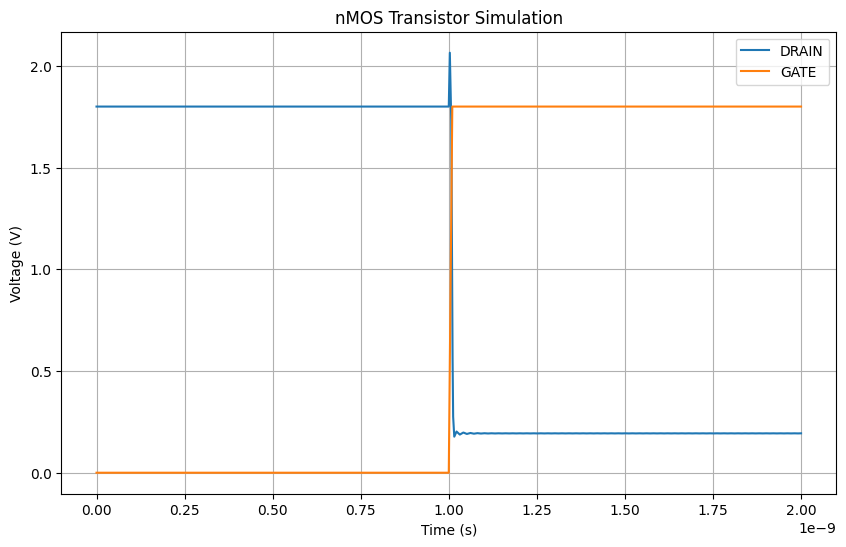

In [18]:
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Doc.ExampleTools import find_libraries
from matplotlib import pyplot as plt
from math import pi
import os
import numpy as np
import matplotlib.pyplot as plt

# Define a circuit
circuit = Circuit('nmos_sim')

# Include the SPICE library and model for the nMOS
circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'tt')
circuit.include('nmos.spice')

# Define power and ground nodes
circuit.V(1, 'VGND', 0, 1.8)
circuit.V(2, 'VPWR', 'VGND', 0)

# Define an nMOS transistor instance
circuit.X(1, 'M', 'DRAIN', 'GATE', 'VGND', 'VGND', model='nmos_model')

# Set up a transient analysis
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10@u_ps, end_time=2@u_ns)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('nMOS Transistor Simulation')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.plot(analysis.time, analysis.DRAIN)
ax.plot(analysis.time, analysis.GATE)
ax.legend(('DRAIN', 'GATE'))
plt.grid(True)
plt.show()


Unsupported Ngspice version 38


.title mosfet0
.include /content/mosfet.spice
.lib /usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt
Xmosfet0 DRAIN GATE VGND mosfet
Vgnd VGND 0 0
Vdd VPWR VGND 1.8
R VPWR DRAIN 10k
VVin GATE VGND DC 0V PULSE(0V 1.8V 1ns 10ps 10ps 1ns 2ns)

done


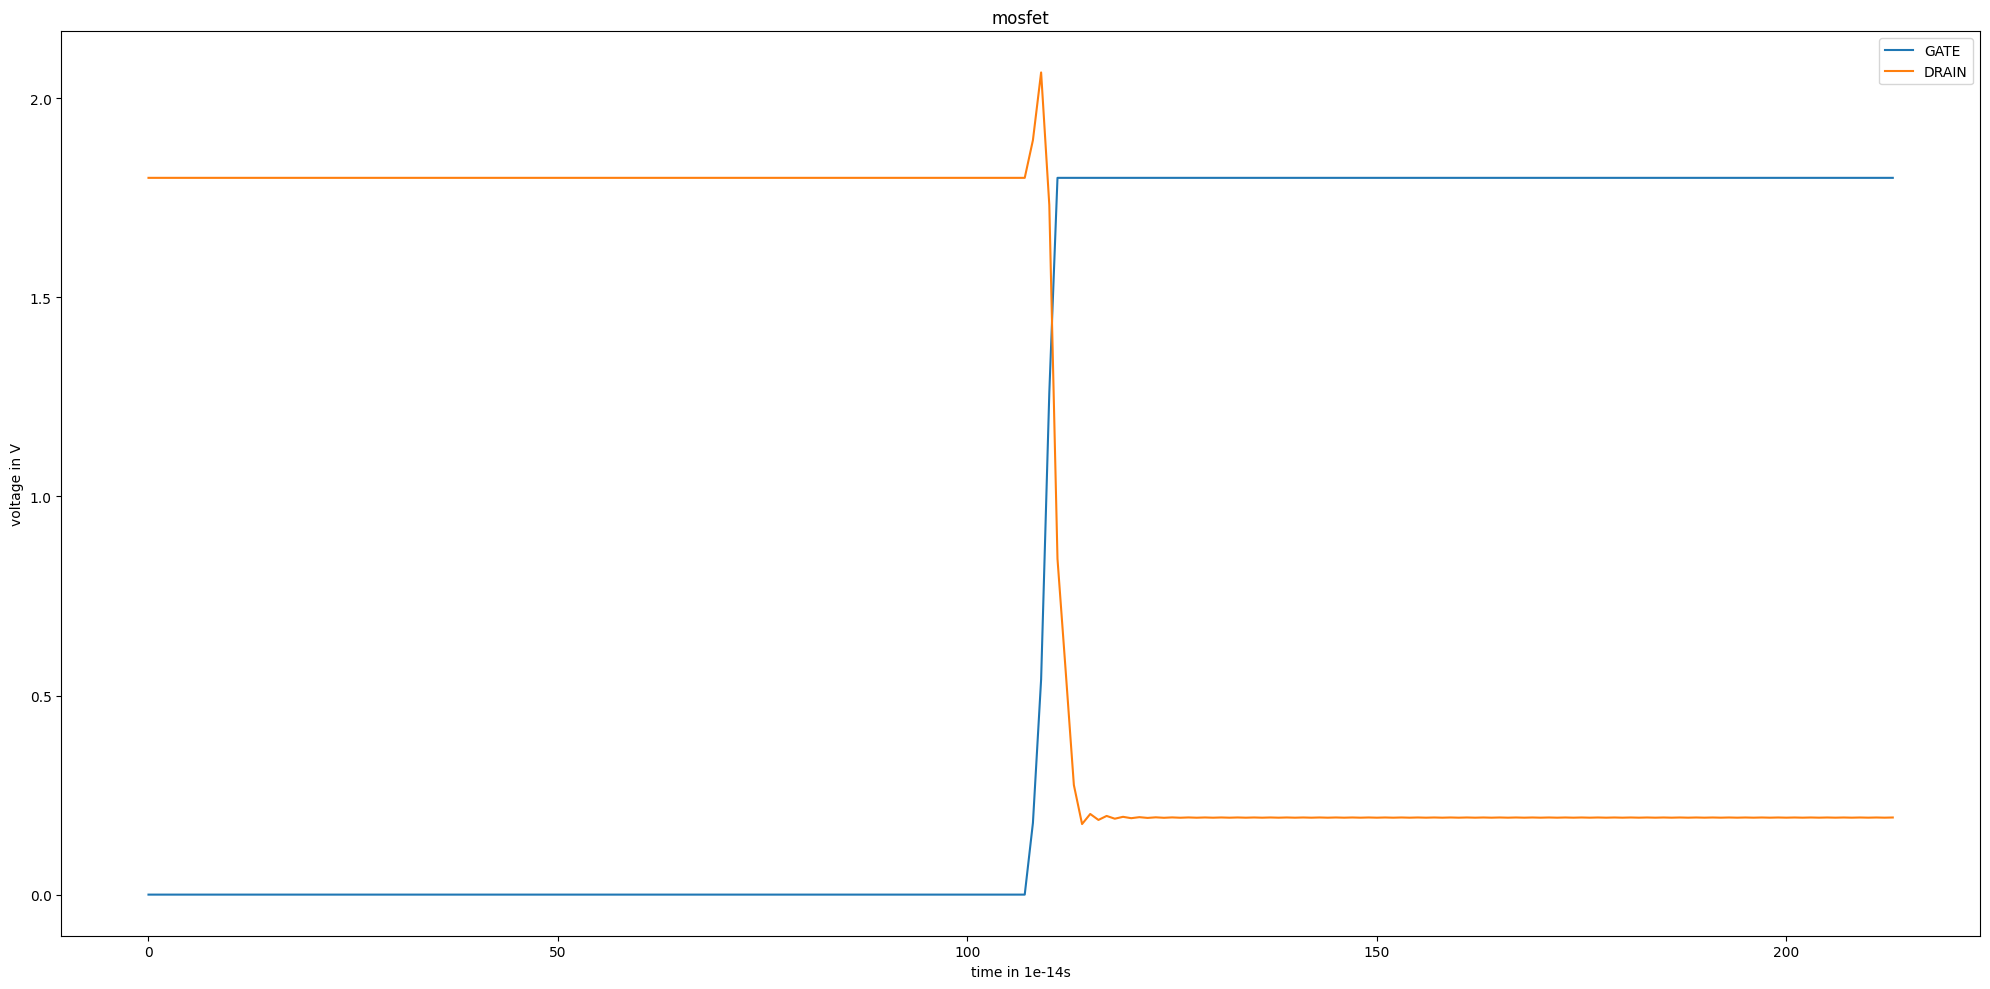

In [6]:
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import *
import matplotlib.pyplot as plt

circuit = Circuit('mosfet0')
circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'tt')
circuit.include('mosfet.spice')
circuit.X('mosfet0', 'mosfet', 'DRAIN', 'GATE', 'VGND')
circuit.V('gnd', 'VGND', 0, 0)
circuit.V('dd', 'VPWR', 'VGND', 1.8)
circuit.R('', 'VPWR', 'DRAIN', '10k')
circuit.PulseVoltageSource('Vin', 'GATE', 'VGND',
                           initial_value=0@u_V, pulsed_value=1.8@u_V,
                           rise_time=10@u_ps, fall_time=10@u_ps,
                           pulse_width=1@u_ns, period=2@u_ns, delay_time=1@u_ns)
print(str(circuit))
simulator = circuit.simulator()
analysis = simulator.transient(step_time=10@u_ps, end_time=2@u_ns)
print('done')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('mosfet')
ax.set_xlabel('time in 1e-14s')
ax.set_ylabel('voltage in V')
ax.plot(analysis.GATE)
ax.plot(analysis.DRAIN)
ax.legend(('GATE', 'DRAIN'))
plt.tight_layout()
plt.show()